In [7]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("../PPG_1/sample_ppg_log_ayon.csv", delimiter = "          ", header = None)
df.head()

C:\Users\siddh\AppData\Local\Temp\ipykernel_23364\3156362934.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../PPG_1/sample_ppg_log_ayon.csv", delimiter = "          ", header = None)


,0,1,2
0,1631800238146,51538,8969
1,1631800238209,51611,9186
2,1631800238271,51680,9406
3,1631800238336,51738,9600
4,1631800238399,51788,9748


In [9]:
df.columns = ["epoch_ms", "ir_intensity", "red_intensity"]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   epoch_ms       514 non-null    int64
 1   ir_intensity   514 non-null    int64
 2   red_intensity  514 non-null    int64
dtypes: int64(3)
memory usage: 12.2 KB


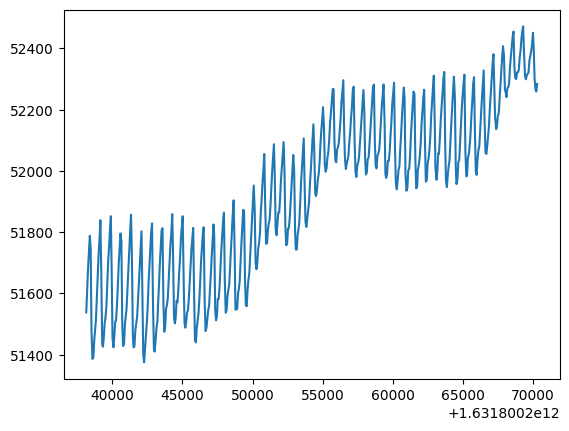

In [11]:
plt.plot(df["epoch_ms"], df["ir_intensity"])

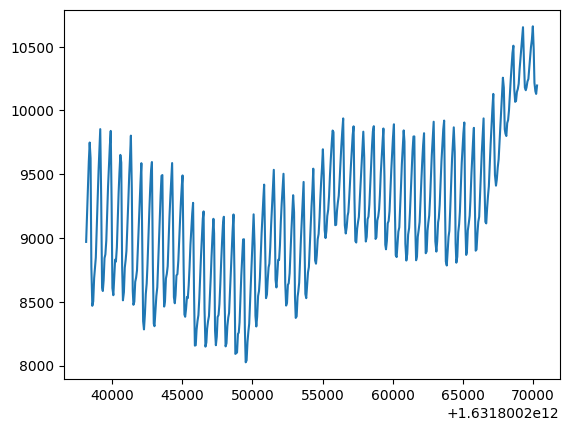

In [12]:
plt.plot(df["epoch_ms"], df["red_intensity"])

In [25]:
def frequency_coiler(time_seq, freq, number_of_samples):
    dict_angle_components = {}
    for index, time in enumerate(time_seq):
        angle = ((2*math.pi*freq) * index)/ number_of_samples
        if dict_angle_components.get(angle, -1) != -1:
            dict_angle_components[angle] += time
        else:
            dict_angle_components[angle] = time

    x_component = 0
    y_component = 0
    for angle, mass in dict_angle_components.items():
        x_component += mass * math.cos(angle)
        y_component += mass * math.sin(angle)
    return math.sqrt(math.pow(x_component, 2) + math.pow(y_component, 2)), math.atan2(y_component, x_component)
    

In [26]:
def get_fft(time_sequence, only_positive=0):
    N = len(time_sequence)
    if only_positive:
        number_of_components = int(N/2)
    else:
        number_of_components = N

    frequency_sequence = {"magnitude" : [], "phase" : []}
    for frequency in range(number_of_components):
        mag, phase = frequency_coiler(time_sequence, frequency, N)
        frequency_sequence["magnitude"].append(mag)
        frequency_sequence["phase"].append(phase)

    return frequency_sequence


In [27]:
self_fft = get_fft(df["ir_intensity"])

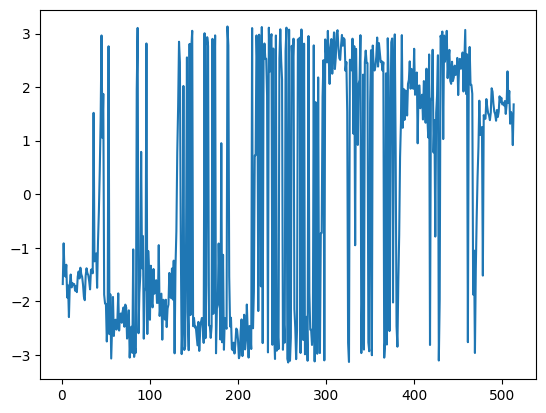

In [28]:
plt.plot(list(range(1, len(self_fft["phase"]))), self_fft["phase"][1:])

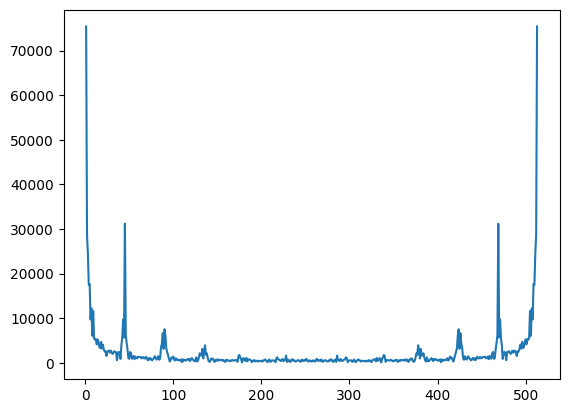

In [29]:
plt.plot(list(range(1, len(self_fft["magnitude"]))), self_fft["magnitude"][1:])

In [18]:
sp = np.fft.fft(df["ir_intensity"])

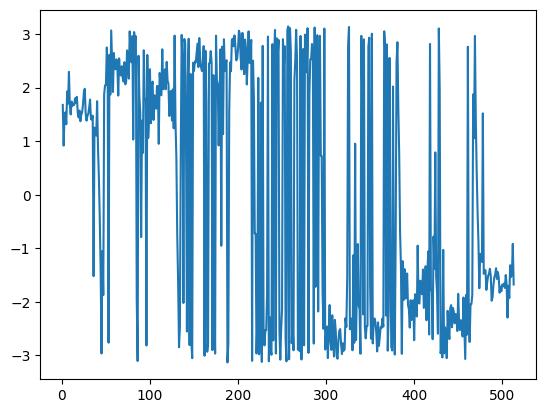

In [21]:
plt.plot(list(range(1, len(self_fft["phase"]))), np.angle(sp)[1:])

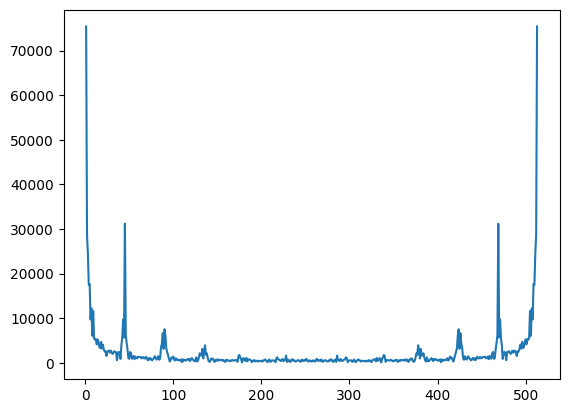

In [20]:
plt.plot(list(range(1, len(self_fft["phase"]))), np.abs(sp)[1:])

In [30]:
self_fft_red = get_fft(df["red_intensity"])

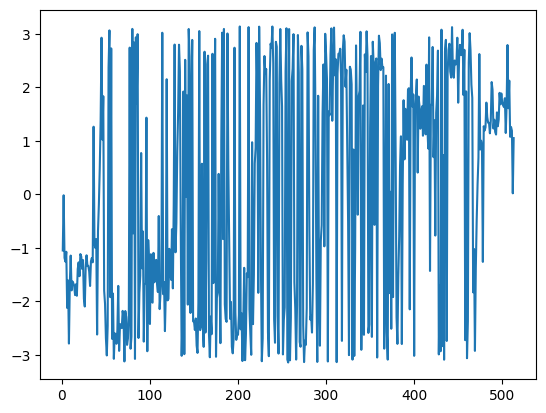

In [31]:
plt.plot(list(range(1, len(self_fft_red["phase"]))), self_fft_red["phase"][1:])

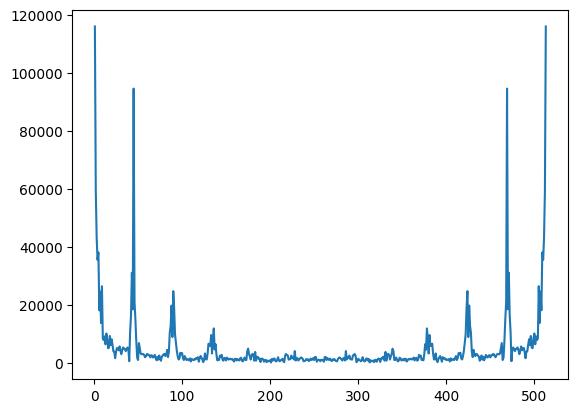

In [32]:
plt.plot(list(range(1, len(self_fft_red["magnitude"]))), self_fft_red["magnitude"][1:])

In [33]:
sp = np.fft.fft(df["red_intensity"])

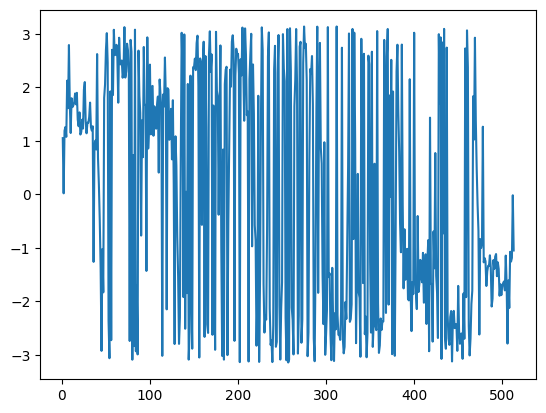

In [34]:
plt.plot(list(range(1, len(self_fft_red["phase"]))), np.angle(sp)[1:])

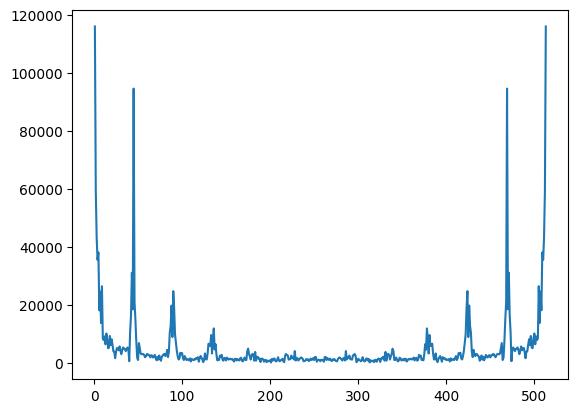

In [35]:
plt.plot(list(range(1, len(self_fft_red["phase"]))), np.abs(sp)[1:])